In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [42]:
df = pd.read_csv('comprehensive_mutual_funds_data.csv')
print(df)

                                           scheme_name  min_sip  min_lumpsum  \
0    Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...      100          100   
1                       Aditya Birla SL Arbitrage Fund     1000         1000   
2       Aditya Birla SL Asset Allocator FoF-Dir Growth     1000         1000   
3     Aditya Birla SL Bal Bhavishya Yojna – Dir Growth      500         1000   
4              Aditya Birla SL Balanced Advantage Fund      100          100   
..                                                 ...      ...          ...   
809            UTI-Unit Linked Insurance Plan – Direct      500        15000   
810                       UTI-Value Opportunities Fund      500         5000   
811                       WhiteOak Capital Liquid Fund      500          500   
812                    WhiteOak Capital Overnight Fund      500          500   
813             WhiteOak Capital Ultra Short Term Fund      500          500   

     expense_ratio  fund_size_cr  fund_

In [43]:
numeric_columns = ['sortino', 'sharpe', 'alpha', 'beta', 'sd']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [44]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [45]:
# Create focused feature set with the most important predictors
df['risk_adjusted_returns'] = df['returns_1yr'] / df['sd']
df['category_encoded'] = df.groupby('category')['returns_1yr'].transform('mean')
df['sub_category_encoded'] = df.groupby('sub_category')['returns_1yr'].transform('mean')

In [46]:
# Select key features that are most likely to influence returns
features = [
    'expense_ratio',          # Cost of the fund
    'fund_age_yr',           # Experience/track record
    'fund_size_cr',          # Size/resources
    'sharpe',                # Risk-adjusted performance
    'alpha',                 # Excess returns
    'beta',                  # Market sensitivity
    'risk_adjusted_returns', # Returns per unit of risk
    'category_encoded',      # Category performance
    'sub_category_encoded'   # Sub-category performance
]

In [47]:
# Extract features and target
X = df[features]
y = df['returns_1yr']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,           # Prevent overfitting
    min_samples_split=5,    # Minimum samples required to split
    min_samples_leaf=2,     # Minimum samples required at leaf node
    random_state=42
)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

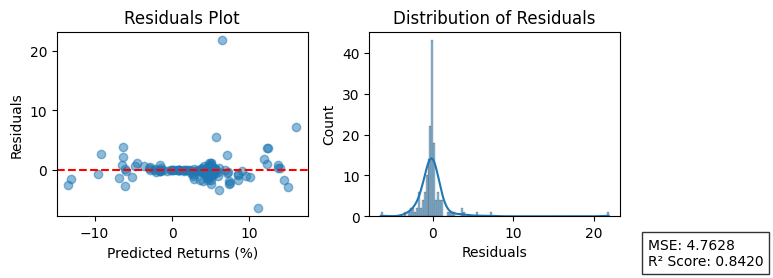

In [50]:
#  Residuals Plot
residuals = y_test - y_pred
plt.subplot(2, 2, 3)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Returns (%)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')

#  Residuals Distribution
plt.subplot(2, 2, 4)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Distribution of Residuals')

#  metrics text
plt.figtext(1.02, 0.02, f'MSE: {mse:.4f}\nR² Score: {r2:.4f}', 
            bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout
plt.tight_layout()
plt.show()

In [51]:
# predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [52]:
# feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(f'Model Performance:')
print(f'MSE: {mse:.4f}')
print(f'R2 Score: {r2:.4f}\n')
print('Feature Importance:')
print(feature_importance)

Model Performance:
MSE: 4.7628
R2 Score: 0.8420

Feature Importance:
                 feature  importance
6  risk_adjusted_returns    0.593281
5                   beta    0.201590
4                  alpha    0.133838
0          expense_ratio    0.022356
7       category_encoded    0.021434
2           fund_size_cr    0.010916
3                 sharpe    0.008334
8   sub_category_encoded    0.006859
1            fund_age_yr    0.001391
